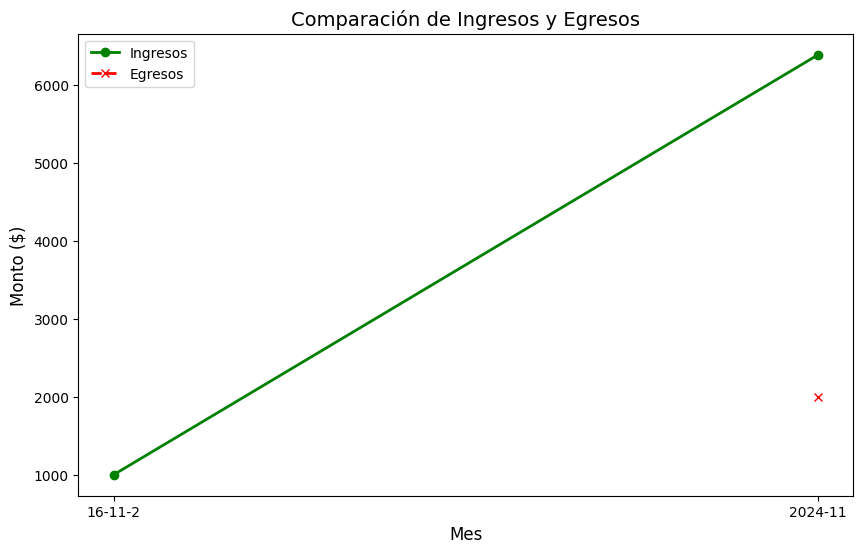

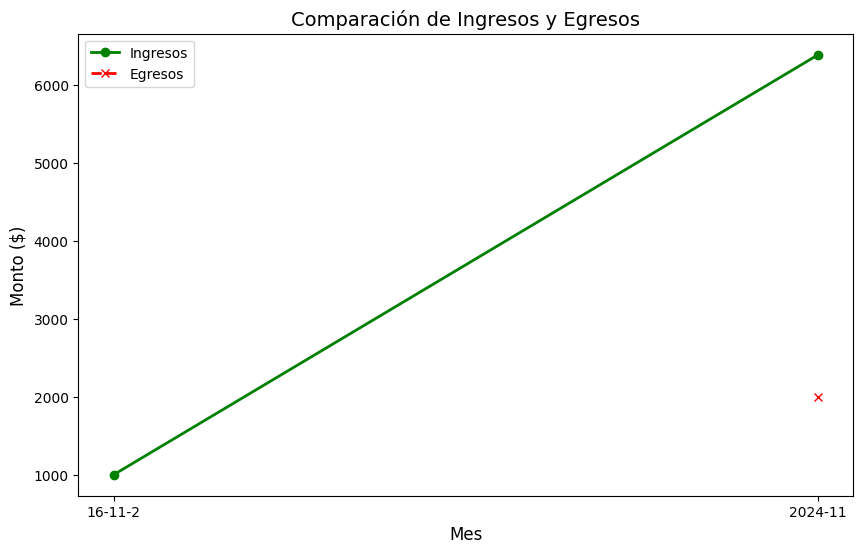

In [4]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Intentamos cargar los archivos CSV, si no existen, creamos dataframes vacíos
try:
    usuarios = pd.read_csv('usuarios.csv')
except Exception as e:
    usuarios = pd.DataFrame(columns=["Nombre del cliente", "I.D.", "Ocupación", 
                                      "Ingreso Mensual", "Meta de Ahorro", "User", 
                                      "Correo", "Contraseña", "Balance"])

try:
    balance_df = pd.read_csv('gastos.csv')
except Exception as e:
    balance_df = pd.DataFrame(columns=["Tipo", "I.D.", "Fecha", "Categoría", "Monto", "Descripción"])

usuario_actual = None    

# Función para graficar ingresos vs. egresos
def graficar_ingresos_egresos():
    # Filtrar los datos de ingresos y egresos para el usuario actual
    ingresos = balance_df[balance_df['Tipo'] == 'Ingreso']
    egresos = balance_df[balance_df['Tipo'] == 'Egreso']

    # Agrupar por fecha (mes) y sumar los montos
    ingresos_por_mes = ingresos.groupby(ingresos['Fecha'].str[:7])['Monto'].sum()
    egresos_por_mes = egresos.groupby(egresos['Fecha'].str[:7])['Monto'].sum()

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(ingresos_por_mes.index, ingresos_por_mes.values, label='Ingresos', color='g', marker='o', linestyle='-', linewidth=2)
    ax.plot(egresos_por_mes.index, egresos_por_mes.values, label='Egresos', color='r', marker='x', linestyle='--', linewidth=2)

    # Etiquetas y título
    ax.set_title('Comparación de Ingresos y Egresos', fontsize=14)
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_ylabel('Monto ($)', fontsize=12)
    ax.legend()

    return fig

# Función para visualizar el gráfico en una nueva ventana
def visualizar_grafico():
    # Crear una nueva ventana para el gráfico
    ventana_grafico = tk.Toplevel(windowsmain)
    ventana_grafico.title("Gráfico Ingresos vs Egresos")

    # Generar el gráfico
    fig = graficar_ingresos_egresos()

    # Convertir el gráfico de Matplotlib a un objeto Tkinter
    canvas = FigureCanvasTkAgg(fig, ventana_grafico)
    canvas.get_tk_widget().pack()

    # Mostrar el gráfico
    canvas.draw()

def func_iniciarSesion():
    global usuarios, usuario_actual

    def func_menuSesionIniciada(usuario):
        global usuarios, usuario_actual

        usuario_actual = usuario

        # Limpiar la ventana antes de mostrar el nuevo menú
        for widget in windowsmain.winfo_children():
            widget.destroy()

        # Etiqueta de bienvenida
        etiqueta_menuSesionIniciada_bienvenida = tk.Label(windowsmain, text=f'Bienvenido {usuario}', font=('Arial', 24))
        etiqueta_menuSesionIniciada_bienvenida.pack()

        # Menú para ingresar ingresos y egresos
        boton_ingresar_ingreso = tk.Button(windowsmain, text='Ingresar Ingreso', command=func_ingresar_ingreso)
        boton_ingresar_ingreso.pack()

        boton_ingresar_egreso = tk.Button(windowsmain, text='Ingresar Egreso', command=func_ingresar_egreso)
        boton_ingresar_egreso.pack()

        # Botón para ver gráfico de ingresos vs. egresos
        boton_ver_grafico = tk.Button(windowsmain, text='Ver Gráfico Ingresos vs. Egresos', command=visualizar_grafico)
        boton_ver_grafico.pack()

    def func_autenticacion():
        global usuarios

        usuario = entradas[0].get()  # Obtener el texto de la primera entrada (Nombre de usuario)
        contraseña = entradas[1].get()  # Obtener el texto de la segunda entrada (Contraseña)

        # Buscar el usuario en el DataFrame
        try:
            if usuario in usuarios['Nombre de usuario'].values:
                index = usuarios.loc[usuarios['Nombre de usuario'] == usuario].index[0]

                if contraseña == usuarios.loc[index, 'Contraseña']:
                    func_menuSesionIniciada(usuario)
                else:
                    messagebox.showerror('Error', "Contraseña incorrecta")
            else:
                messagebox.showerror('Error', "Usuario no encontrado")
        except Exception as e:
            messagebox.showerror('Error', 'Cree un usuario y una contraseña primero')

    for widget in windowsmain.winfo_children():
        widget.destroy()

    etiqueta_iniciarSesion_bienvenida = tk.Label(windowsmain, text='Iniciar sesión', font=('Arial', 24))
    etiqueta_iniciarSesion_bienvenida.pack()

    etiquetas = [
        'Nombre',
        'Contraseña'
    ]

    entradas = []

    for etiqueta in etiquetas:
        label = tk.Label(windowsmain, text=etiqueta, font=('Arial', 16))
        label.pack()
        entry = tk.Entry(windowsmain, width=40, font=('Arial', 12))
        entry.pack()

        entradas.append(entry)
    
    boton_iniciarSesion_procesar = tk.Button(windowsmain, text='Iniciar sesión', command=func_autenticacion)
    boton_iniciarSesion_procesar.pack()

    boton_iniciarSesion_volver = tk.Button(windowsmain, text='Volver', command=func_menuPrincipal)
    boton_iniciarSesion_volver.pack()

def func_ingresar_ingreso():
    def guardar_ingreso():
        global balance_df
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        categoria = entrada_categoria.get()
        monto = entrada_monto.get()
        descripcion = entrada_descripcion.get()
        id_usuario = usuarios.loc[usuarios['Nombre de usuario'] == usuario_actual, 'I.D.'].values[0]

        nuevo_ingreso = pd.DataFrame([[ 'Ingreso', id_usuario, fecha, categoria, float(monto), descripcion ]],
                                      columns=["Tipo", "I.D.", "Fecha", "Categoría", "Monto", "Descripción"])
        balance_df = pd.concat([balance_df, nuevo_ingreso], ignore_index=True)
        balance_df.to_csv("gastos.csv", index=False)
        messagebox.showinfo('Ingreso guardado', '¡Ingreso registrado con éxito!')

    for widget in windowsmain.winfo_children():
        widget.destroy()

    etiqueta_ingresar_ingreso = tk.Label(windowsmain, text='Registrar Ingreso', font=('Arial', 24))
    etiqueta_ingresar_ingreso.pack()

    etiqueta_categoria = tk.Label(windowsmain, text='Categoría:', font=('Arial', 16))
    etiqueta_categoria.pack()
    entrada_categoria = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_categoria.pack()

    etiqueta_monto = tk.Label(windowsmain, text='Monto:', font=('Arial', 16))
    etiqueta_monto.pack()
    entrada_monto = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_monto.pack()

    etiqueta_descripcion = tk.Label(windowsmain, text='Descripción:', font=('Arial', 16))
    etiqueta_descripcion.pack()
    entrada_descripcion = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_descripcion.pack()

    boton_guardar_ingreso = tk.Button(windowsmain, text='Guardar Ingreso', command=guardar_ingreso)
    boton_guardar_ingreso.pack()

    boton_volver = tk.Button(windowsmain, text='Volver', command=func_menuPrincipal)
    boton_volver.pack()

def func_ingresar_egreso():
    def guardar_egreso():
        global balance_df
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        categoria = entrada_categoria.get()
        monto = entrada_monto.get()
        descripcion = entrada_descripcion.get()
        id_usuario = usuarios.loc[usuarios['Nombre de usuario'] == usuario_actual, 'I.D.'].values[0]

        nuevo_egreso = pd.DataFrame([[ 'Egreso', id_usuario, fecha, categoria, float(monto), descripcion ]],
                                     columns=["Tipo", "I.D.", "Fecha", "Categoría", "Monto", "Descripción"])
        balance_df = pd.concat([balance_df, nuevo_egreso], ignore_index=True)
        balance_df.to_csv("gastos.csv", index=False)
        messagebox.showinfo('Egreso guardado', '¡Egreso registrado con éxito!')

    for widget in windowsmain.winfo_children():
        widget.destroy()

    etiqueta_ingresar_egreso = tk.Label(windowsmain, text='Registrar Egreso', font=('Arial', 24))
    etiqueta_ingresar_egreso.pack()

    etiqueta_categoria = tk.Label(windowsmain, text='Categoría:', font=('Arial', 16))
    etiqueta_categoria.pack()
    entrada_categoria = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_categoria.pack()

    etiqueta_monto = tk.Label(windowsmain, text='Monto:', font=('Arial', 16))
    etiqueta_monto.pack()
    entrada_monto = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_monto.pack()

    etiqueta_descripcion = tk.Label(windowsmain, text='Descripción:', font=('Arial', 16))
    etiqueta_descripcion.pack()
    entrada_descripcion = tk.Entry(windowsmain, width=40, font=('Arial', 12))
    entrada_descripcion.pack()

    boton_guardar_egreso = tk.Button(windowsmain, text='Guardar Egreso', command=guardar_egreso)
    boton_guardar_egreso.pack()

    boton_volver = tk.Button(windowsmain, text='Volver', command=func_menuPrincipal)
    boton_volver.pack()

def func_registrarse():
    global usuarios
    def cargar_datos():
        global usuarios
        
        cedula = entradas[1].get()

        try:
            cedula_int = int(cedula)
        except ValueError:
            messagebox.showerror('Error', 'La cédula de identidad debe ser un número entero válido.')
            return
        nuevo_usuario = {
            'Nombre del cliente': entradas[0].get(),
            'I.D.': cedula_int,
            'Ocupación': entradas[2].get(),
            'Ingreso mensual': entradas[3].get(),
            'Meta de ahorro': entradas[4].get(),
            'Nombre de usuario': entradas[5].get(),
            'Correo': entradas[6].get(),
            'Contraseña': entradas[7].get(),
            'Balance': 0.00
        }

        nuevo_usuario_df = pd.DataFrame([nuevo_usuario])
        usuarios = pd.concat([usuarios, nuevo_usuario_df], ignore_index=True)
        usuarios.to_csv("usuarios.csv", index=False)
        
        messagebox.showinfo('Registro exitoso', '¡Usuario registrado con éxito!')

    for widget in windowsmain.winfo_children():
        widget.destroy()
        
    etiqueta_registrarse_bienvenida = tk.Label(windowsmain, text='Registro de usuario nuevo', font=('Arial', 24))
    etiqueta_registrarse_bienvenida.pack()

    etiquetas = [
        'Nombre y apellido: ',
        'Cédula de identidad: ',
        'Ocupación laboral: ',
        'Ingreso mensual: ',
        'Meta de ahorro: ',
        'Nombre de usuario: ',
        'Correo electrónico: ',
        'Contraseña: '
    ]
    
    entradas = []
    for etiqueta in etiquetas:
        label = tk.Label(windowsmain, text=etiqueta, font=('Arial', 16))
        label.pack()
        entry = tk.Entry(windowsmain, width=40, font=('Arial', 12))
        entry.pack()
        entradas.append(entry)

    boton_registrarse_enviarDatos = tk.Button(windowsmain, text='Cargar datos', command=cargar_datos)
    boton_registrarse_enviarDatos.pack()

    boton_registrarse_atras = tk.Button(windowsmain, text='Volver a atrás', command=func_menuPrincipal)
    boton_registrarse_atras.pack()

def func_salir():
    windowsmain.destroy()

def func_menuPrincipal():
    windowsmain.title('CachiChén')

    for widget in windowsmain.winfo_children():
        widget.destroy()

    etiqueta_menuPrincipal_bienvenida = tk.Label(windowsmain, text='Bienvenido/a a CachiChén', font=('Arial', 24))
    etiqueta_menuPrincipal_bienvenida.pack()
    
    boton_iniciarSesion = tk.Button(windowsmain, text='Iniciar sesión', command=func_iniciarSesion)
    boton_iniciarSesion.pack()

    boton_registrarse = tk.Button(windowsmain, text='Registrarse', command=func_registrarse)
    boton_registrarse.pack()

    boton_salir = tk.Button(windowsmain, text='Salir', command=func_salir)
    boton_salir.pack()

# Crear la ventana principal
windowsmain = tk.Tk()
windowsmain.geometry("1366x768")

func_menuPrincipal()

# Ejecutar la aplicación
windowsmain.mainloop()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import matplotlib.backends.backend_tkagg as tkagg

# Inicializar los ingresos totales y el historial de transacciones
ingresos_totales = 0
historial_transacciones = []
balance = {'Gastos Fijos': 0, 'Ahorro': 0, 'Ocio': 0}

def agregar_ingreso():
    global ingresos_totales
    try:
        monto = float(entry_ingreso.get())
        if monto <= 0:
            raise ValueError("El monto debe ser positivo.")
        ingresos_totales += monto
        titulo = entry_titulo_ingreso.get().strip()
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        historial_transacciones.append({'Fecha': fecha, 'Monto': monto, 'Tipo': 'Ingreso', 'Título': titulo})
        messagebox.showinfo("Ingreso agregado", f"Ingreso de {monto} añadido correctamente.")
    except ValueError as e:
        messagebox.showerror("Error", f"Error: {e}. Intenta nuevamente.")

def seleccionar_plan_ahorro():
    if ingresos_totales <= 0:
        messagebox.showwarning("Advertencia", "Por favor, ingrese un monto total antes de seleccionar un plan de ahorro.")
        return
    opcion = plan_ahorro.get()
    if opcion == 1:
        return 0.60, 0.30, 0.10
    elif opcion == 2:
        return 0.50, 0.35, 0.15
    elif opcion == 3:
        return 0.70, 0.20, 0.10

def calcular_distribucion(ingresos, plan):
    gastos_fijos = ingresos * plan[0]
    ahorro = ingresos * plan[1]
    ocio = ingresos * plan[2]
    return gastos_fijos, ahorro, ocio

def mostrar_grafica_ventana(gastos_fijos, ahorro, ocio):
    # Crear una nueva ventana (Toplevel)
    ventana_grafica = tk.Toplevel()
    ventana_grafica.title("Distribución del Ingreso")
    ventana_grafica.geometry("600x500")

    categorias = ['Gastos Fijos', 'Ahorro', 'Ocio']
    valores = [gastos_fijos, ahorro, ocio]

    fig, ax = plt.subplots(figsize=(6, 4))
    barras = ax.bar(categorias, valores, color=['blue', 'green', 'red'])
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Monto')
    ax.set_title('Distribución del Ingreso')

    # Añadir etiquetas con la cantidad exacta de dinero
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    # Mostrar la gráfica en la ventana secundaria
    canvas = tkagg.FigureCanvasTkAgg(fig, master=ventana_grafica)
    canvas.get_tk_widget().pack(pady=20)
    canvas.draw()

def agregar_transaccion():
    try:
        monto = float(entry_monto_transaccion.get())
        if monto <= 0:
            raise ValueError("El monto debe ser positivo.")
        tipo = transaccion.get()
        titulo = entry_titulo_transaccion.get().strip()
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        historial_transacciones.append({'Fecha': fecha, 'Monto': monto, 'Tipo': tipo, 'Título': titulo})
        balance[tipo] += monto
        messagebox.showinfo("Transacción añadida", f"Transacción de {monto} para {tipo} añadida correctamente.")
        mostrar_balance()
    except ValueError as e:
        messagebox.showerror("Error", f"Error: {e}. Intenta nuevamente.")

def mostrar_balance():
    # Crear una nueva ventana (Toplevel) para mostrar el balance
    ventana_balance = tk.Toplevel()
    ventana_balance.title("Balance Actual")
    ventana_balance.geometry("600x500")

    categorias = list(balance.keys())
    valores = list(balance.values())

    fig, ax = plt.subplots(figsize=(6, 4))
    barras = ax.bar(categorias, valores, color=['blue', 'green', 'red'])
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Monto')
    ax.set_title('Balance Actual')

    # Añadir etiquetas con la cantidad exacta de dinero
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.2f}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    # Mostrar la gráfica en la ventana secundaria
    canvas = tkagg.FigureCanvasTkAgg(fig, master=ventana_balance)
    canvas.get_tk_widget().pack(pady=20)
    canvas.draw()

def mostrar_historial():
    if historial_transacciones:
        df = pd.DataFrame(historial_transacciones)
        messagebox.showinfo("Historial de Transacciones", df.to_string())
    else:
        messagebox.showinfo("Historial", "No hay transacciones registradas.")

# Crear ventana principal
ventana = tk.Tk()
ventana.title("Plan de Ahorro")
ventana.geometry("600x600")  # Aumenté el tamaño para más espacio

# Sección de Ingreso
tk.Label(ventana, text="Ingreso Total").pack(pady=5)
entry_ingreso = tk.Entry(ventana)
entry_ingreso.pack(pady=5)

tk.Label(ventana, text="Título del Ingreso").pack(pady=5)
entry_titulo_ingreso = tk.Entry(ventana)
entry_titulo_ingreso.pack(pady=5)

btn_ingreso = tk.Button(ventana, text="Agregar Ingreso", command=agregar_ingreso)
btn_ingreso.pack(pady=10)

# Sección de Plan de Ahorro
tk.Label(ventana, text="Selecciona el Plan de Ahorro").pack(pady=5)
plan_ahorro = tk.IntVar()
tk.Radiobutton(ventana, text="60% Gastos Fijos, 30% Ahorro, 10% Ocio", variable=plan_ahorro, value=1).pack(pady=5)
tk.Radiobutton(ventana, text="50% Gastos Fijos, 35% Ahorro, 15% Ocio", variable=plan_ahorro, value=2).pack(pady=5)
tk.Radiobutton(ventana, text="70% Gastos Fijos, 20% Ahorro, 10% Ocio", variable=plan_ahorro, value=3).pack(pady=5)

btn_plan_ahorro = tk.Button(ventana, text="Ver Distribución", command=lambda: mostrar_grafica_ventana(*calcular_distribucion(ingresos_totales, seleccionar_plan_ahorro())))
btn_plan_ahorro.pack(pady=10)

# Sección de Transacciones
tk.Label(ventana, text="Monto de Transacción").pack(pady=5)
entry_monto_transaccion = tk.Entry(ventana)
entry_monto_transaccion.pack(pady=5)

tk.Label(ventana, text="Título de Transacción").pack(pady=5)
entry_titulo_transaccion = tk.Entry(ventana)
entry_titulo_transaccion.pack(pady=5)

tk.Label(ventana, text="Tipo de Transacción").pack(pady=5)
transaccion = tk.StringVar()
tk.Radiobutton(ventana, text="Gastos Fijos", variable=transaccion, value="Gastos Fijos").pack(pady=5)
tk.Radiobutton(ventana, text="Ahorro", variable=transaccion, value="Ahorro").pack(pady=5)
tk.Radiobutton(ventana, text="Ocio", variable=transaccion, value="Ocio").pack(pady=5)

btn_transaccion = tk.Button(ventana, text="Agregar Transacción", command=agregar_transaccion)
btn_transaccion.pack(pady=10)

# Mostrar Historial
btn_historial = tk.Button(ventana, text="Mostrar Historial", command=mostrar_historial)
btn_historial.pack(pady=10)

# Iniciar la interfaz gráfica
ventana.mainloop()
